<IPython.core.display.Javascript object>


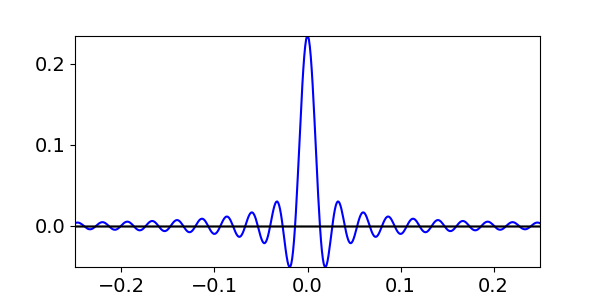

In [3]:
# 祐佑的
import numpy as np

def rect(x, B):
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1) = plt.subplots(1, figsize=(6, 3))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.sin(x), '-b')

def animate(B):
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, 

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

In [10]:
# 庭瑄的
import numpy as np
import scipy as sp
import math

# Constant set
E0, k, w ,w0, r = 1, 1, 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 10**4
kapa = 0.5*N* q**2 * w**2 /(m*epsilon0*c)

# Set the range of z and time
zRange,zAmount = 100, 500
z = np.linspace(0,zRange,zAmount)
tRange,tAmount = 100, 7
t = np.linspace(0,tRange,tAmount)

# Calculate electrofield.
# E is a 2D-array with time row and position colum (E[t][z])
E=np.empty((tAmount,zAmount), float)
E_i=np.empty((zAmount,1),float)

i=0
E_i = np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t[i])) )
E[i,:]=E_i
x0 = E[0]*q/m/(w0**2 - w**2 - 1j*r*w)

for i in range(0,len(t)) :
    E_i = np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t[i])) )
    E[i,:]=E_i
    x = np.real(x0 * np.exp(-1j*w*t[i]))


<IPython.core.display.Javascript object>


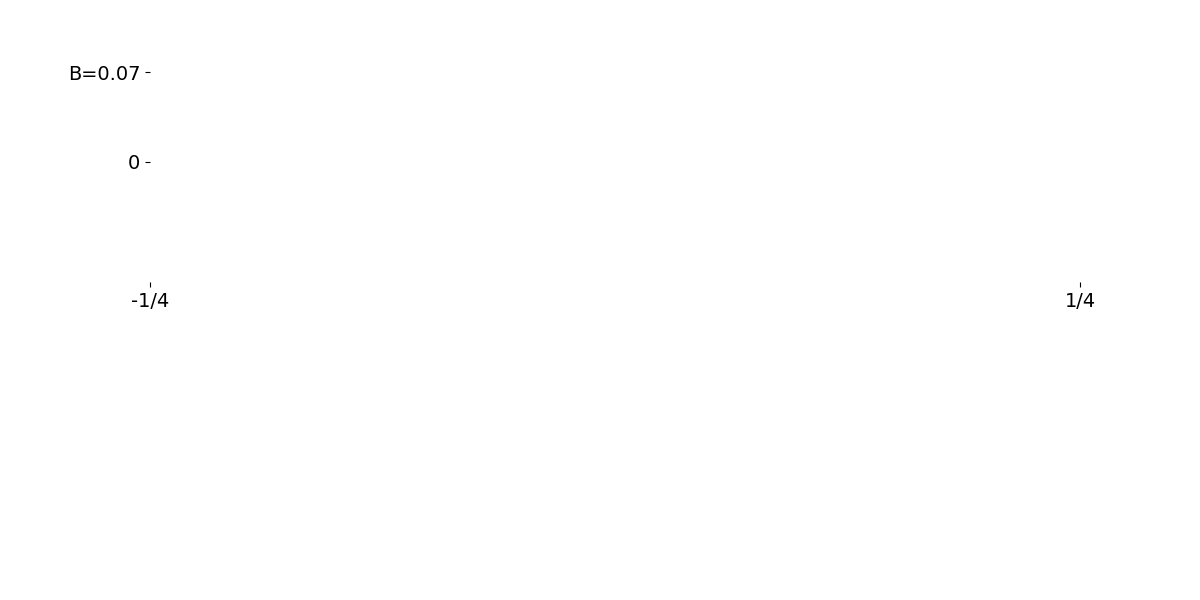

In [9]:
# draw sine animation
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w`
    B is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.zeros(len(x)), '-b')
box, = ax2.plot(x, np.zeros(len(x)), '-r')

def animate(B):
    """
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: rect width
    
    return:
        sinc: ydata
        box: ydata
    """
    
    # create our rect object
    f = rect(len(x), B)
    box.set_ydata(f)
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
             yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
    # format the ax2 xticks to move with the box
    plt.setp(ax2, yticks=[0, 1], 
             xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, box,

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


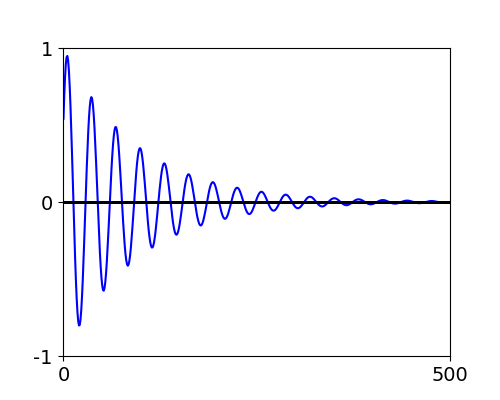

In [39]:
# 嘗試合併中

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constant set
E0, k, w ,w0, r = 1, 1, 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 10**4
kapa = 0.5*N* q**2 * w**2 /(m*epsilon0*c)

# Set the range of z and time
zRange,zLength = 100, 500
z = np.linspace(0,zRange,zLength)
tRange,tLength = 100, 7
t = np.linspace(0,tRange,tLength)

# create figure and axes 
fig, (ax1) = plt.subplots(1,figsize=(5,4))

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')

def animate(t):
    """
    this function gets called by FuncAnimation
    
    """
    
    # create our line object
    E = np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.show()